# Mixed Membership Stochastic Blockmodel (MMSBM)

In [1]:
import graspologic

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Unlike [Stochastic Block Models (SBM)](./sbm.ipynb), Mixed Membership Stochastic Blockmodels (MMSBM) allow nodes to pertain to multiple communities when interacting with other nodes.

Given a network with $k$ communities, an MMSBM is parametrized by the number of nodes $n$ of the graph, a block connectivity matrix $B \in \mathbb{R}^{k x k}$ where each element specifies the probability of interaction between nodes based upon their community membership, and a vector $\vec{\alpha}$ which controls the mixed-membership allowed for each node.

Below, we sample a two-block MMSBM with following parameters:

\begin{align*}
n &= 100\\
P &= \begin{bmatrix} 
0.7 & 0.2\\
0.2 & 0.05
\end{bmatrix}\\
\vec{\alpha} &= \begin{bmatrix} 0.1 & 0.1 \end{bmatrix}\\
\end{align*}

In [2]:
from graspologic.simulations import mmsbm

rng = np.random.default_rng(123)

n = 100
p = [[0.7, 0.2],
     [0.2, 0.05]]
alpha = [0.1]*2

G = mmsbm(n, p, alpha, rng = rng)

## Visualize the graph using heatmap

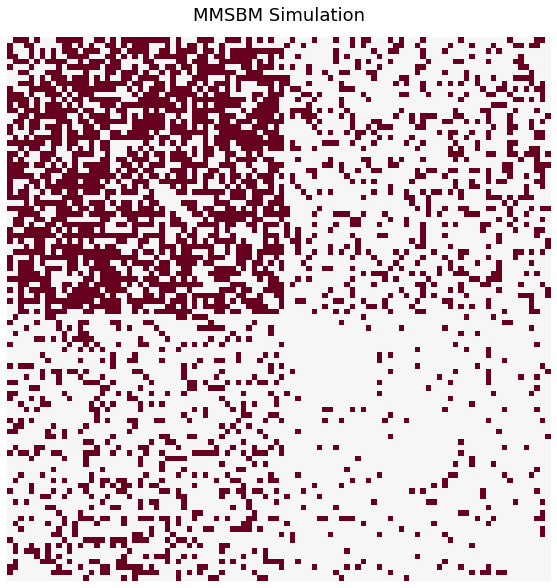

In [3]:
from graspologic.plot import heatmap

heatmap(G, cbar= False, title ='MMSBM Simulation');

## Generating various types of graphs

Each node $p$ is assigned a membership vector $\vec{\pi}_p \in \mathbb{R}^{k}$ sampled from a [Dirichlet distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution):
\begin{align*}
\vec{\pi}_p \sim \mbox{Dir}(\vec{\alpha})\\
\end{align*}

This vector indicates the probability of a node to interact with other nodes as if belonging to a certain community. For example, in a four communities graph, let:

\begin{align*}
\vec{\pi}_p &= \begin{bmatrix} 1 & 0 & 0 & 0 \end{bmatrix}\\
\vec{\pi}_q &= \begin{bmatrix} 0.25 & 0.25 & 0.25 & 0.25 \end{bmatrix}\\
\end{align*}

According to $\vec{\pi}_p$, node $p$ will always behave as if pertaining to the first community when interacting with other nodes, while node $q$ will interact 25% of the time as if belonging to community 1, 25% of the time as if belonging to community 2, etc.

Therefore, controlling these membership vectors by varying the parameter $\vec{\alpha}$ allows generation of various types of graphs.


### Generating Erdos-Renyi (ER) graphs

To generate [Erdos-Renyi (ER)](./erdos_renyi.ipynb), one of the $\vec{\alpha}$ entries can be set to be much greater than the others.

For example, consider the two graphs (undirected, no self-loops) parameterized by:

\begin{align*}
n &= 100\\
P &= \begin{bmatrix} 
0.8 & 0.2\\
0.2 & 0.5
\end{bmatrix}\\
\end{align*}

With $\vec{\alpha}$ respectively equal to:

\begin{align*}
\vec{\alpha_1} &= \begin{bmatrix} 100 & 1 \end{bmatrix}\\
\vec{\alpha_2} &= \begin{bmatrix} 1 & 100 \end{bmatrix}\\
\end{align*}


In [4]:
from graspologic.simulations import er_np

n = 100
p = [[0.8, 0.2],
     [0.2, 0.5]]

alpha_1 = [100, 1]
G_1 =  mmsbm(n, p, alpha_1, rng = rng)

alpha_2 = [1, 100]
G_2 =  mmsbm(n, p, alpha_2, rng = rng)

### Visualize the graphs using heatmap

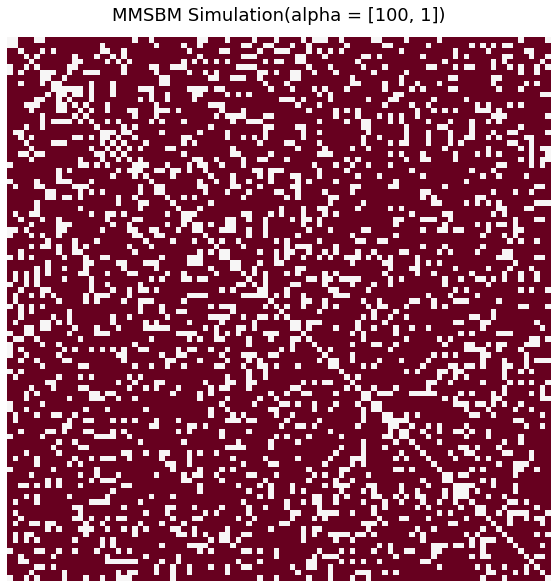

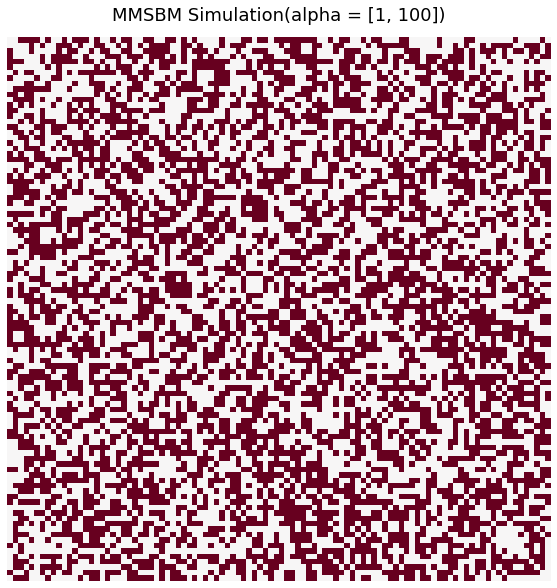

In [5]:
heatmap(G_1, cbar= False, title ='MMSBM Simulation(alpha = [100, 1])');
heatmap(G_2, cbar= False, title ='MMSBM Simulation(alpha = [1, 100])');

### Differences with Stochastic Block Model (SBM) graphs

According to the [Stochastic Block Models (SBM)](./sbm.ipynb), each node in a graph can only pertain to one community. Therefore, one way to recreate such model with an MMSBM is to set all the entries of $\vec{\alpha}$ equal to the same value. The closer the value is to $0$ the more the simulated graphs will appear similar to an SBM, the closer the value is to $1$ the more uniform the graph will look, thus losing the community structure dictated by the SBM.

To show this we sample a four-block SBM (undirected, no self-loops) graph with following parameters:
\begin{align*}
n &= \begin{bmatrix} 50 & 50 & 50 & 50 \end{bmatrix}\\
B &=\begin{bmatrix} 0.8 & 0.2 & 0.2 & 0.2 \\ 0.2 & 0.8 & 0.2 & 0.2 \\ 0.2 & 0.2 & 0.8 & 0.2 \\ 0.2 & 0.2 & 0.2 & 0.8 \end{bmatrix}
\end{align*}

We also sample a four-block MMSBM with parameter $\vec{\alpha}$ such that:
\begin{align*}
\vec{\alpha} &= \begin{bmatrix} 0.01 & 0.01 & 0.01 & 0.01 \end{bmatrix}\\
\end{align*}


In [6]:
from graspologic.simulations import sbm

n = [50] * 4
p = [[0.8,0.2,0.2,0.2],
    [ 0.2,0.8,0.2,0.2],
    [ 0.2,0.2,0.8,0.2],
    [ 0.2,0.2,0.2,0.8]]

G_sbm = sbm(n, p, directed=False, loops=False)

n = 200
k = 4
alpha = [0.01]*k

G_mmsbm = mmsbm(n, p, alpha= alpha, rng = rng)

### Plot SBM and MMSBM graphs using heatmap

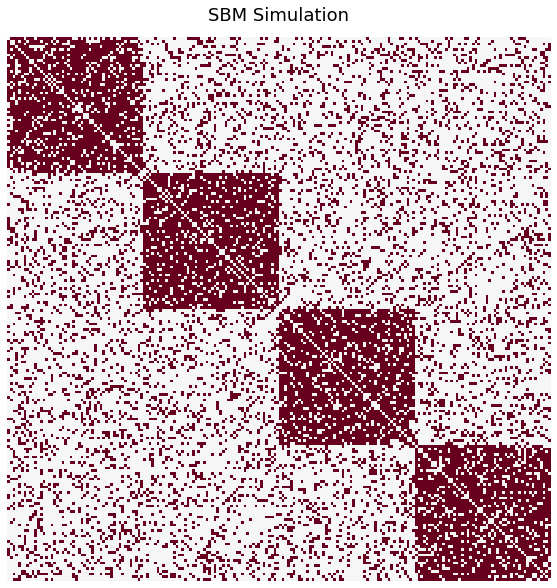

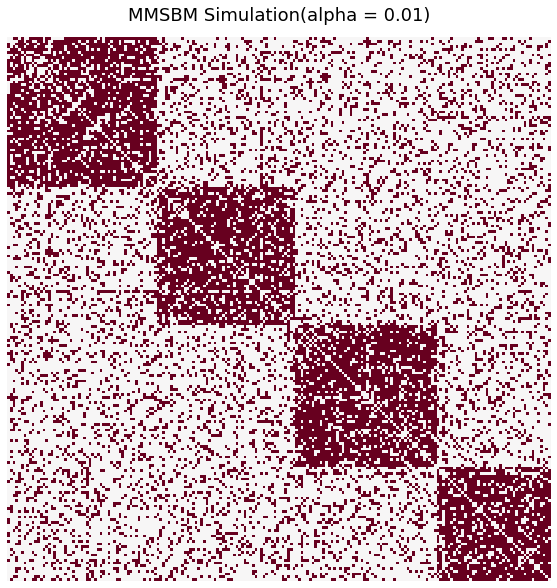

In [7]:
heatmap(G_sbm, cbar= False, title ='SBM Simulation');
heatmap(G_mmsbm, cbar= False, title ='MMSBM Simulation(alpha = 0.01)');

As expected, the two graphs appear to be generated from four-block SBMs with connectivity matrix $B$. In the MMSBM case, the number of nodes assigned to each block is not specified which is why we can see a different number of nodes per block.

Now let's try increasing the values of each entry of the concentration parameter $\vec{\alpha}$ first to $0.25$, then $0.5$ and finally to $1$.

First increase alpha to: [0.25, 0.25, 0.25, 0.25]
Then increase alpha to: [0.5, 0.5, 0.5, 0.5]
Finally increase alpha to: [1.0, 1.0, 1.0, 1.0]


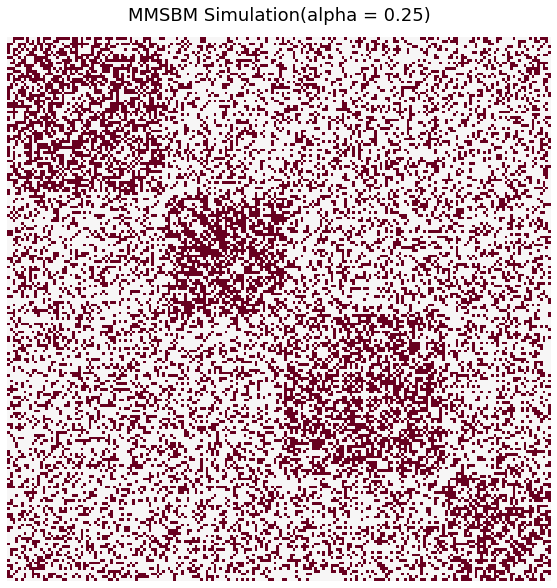

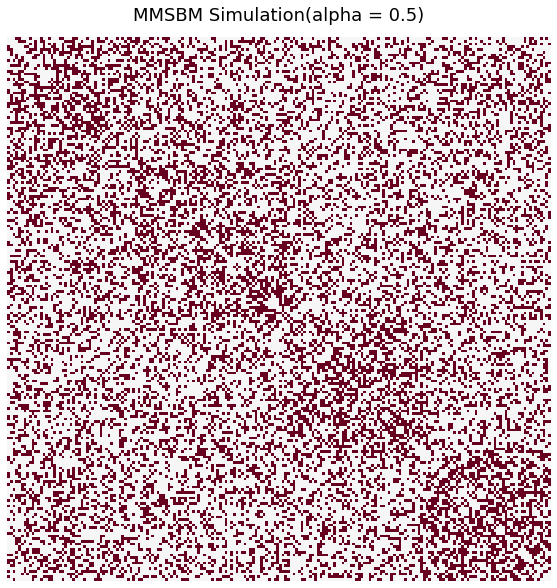

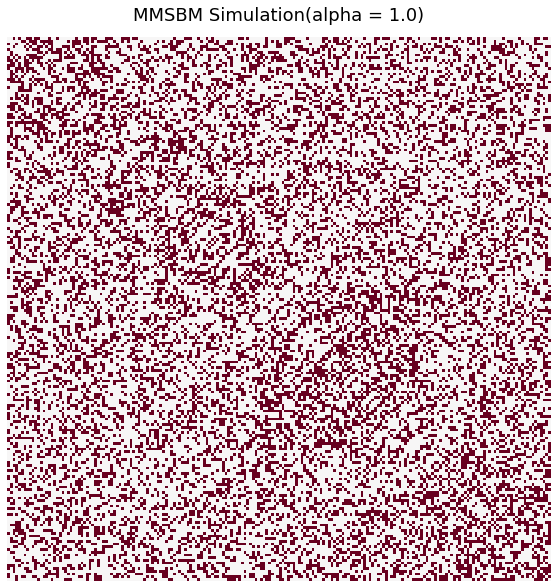

In [8]:
alpha = [0.25]*k
print("First increase alpha to: " + str(alpha))

G_mmsbm_25 = mmsbm(n, p, alpha= alpha, rng = rng)
heatmap(G_mmsbm_25, cbar= False, title ='MMSBM Simulation(alpha = 0.25)');

alpha = [0.5]*k
print("Then increase alpha to: " + str(alpha))

G_mmsbm_50 = mmsbm(n, p, alpha= alpha, rng = rng)
heatmap(G_mmsbm_50, cbar= False, title ='MMSBM Simulation(alpha = 0.5)');

alpha = [1.0]*k
print("Finally increase alpha to: " + str(alpha))

G_mmsbm_100 = mmsbm(n, p, alpha= alpha, rng = rng)
heatmap(G_mmsbm_100, cbar= False, title ='MMSBM Simulation(alpha = 1.0)');

As expected, as we increase the value of $\vec{\alpha}$ we increase the mixed-membership allowed at each node so that the community structure is progressively lost.